# Question 2 (a) Simple Monte Carlo

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Question(a): Simple MC methods

def func(x):
    y = np.sqrt(x)/np.sqrt(x+1) *np.exp(-x)
    return y 

zscore95 = 1.96


print('================ (a) Simple Monte Carlo ==================')
N_size = [100,1000,10000]
y_simple_MC =[]
for i, n_sample in enumerate(N_size):
    u =np.random.uniform(1,3,n_sample)
    y_simple_MC.append([2*func(u)])
    mean_simple_mc = np.mean(y_simple_MC[i])
    variance_np = np.var(y_simple_MC[i])
    SE_simple = np.sqrt(variance_np)/np.sqrt(n_sample)

    lower_b = mean_simple_mc-zscore95*SE_simple
    upper_b = mean_simple_mc+zscore95*SE_simple
    CI95 = [lower_b , upper_b]
    print('')
    print('**** Number of sample = ', n_sample,'  ****')
    print('theta = ', mean_simple_mc, ' Standar Error = ',SE_simple )
    print('95% Confidence intervals = ', CI95)
    
    

================ (a) Simple Monte Carlo ==================

**** Number of sample =  100   ****
theta =  0.2296773891656675  Standar Error =  0.010855239505337653
95% Confidence intervals =  [0.2084011197352057, 0.2509536585961293]

**** Number of sample =  1000   ****
theta =  0.25036185986051623  Standar Error =  0.003908858208183615
95% Confidence intervals =  [0.24270049777247635, 0.2580232219485561]

**** Number of sample =  10000   ****
theta =  0.25031530255356654  Standar Error =  0.0012501731433849533
95% Confidence intervals =  [0.24786496319253204, 0.25276564191460105]


# Question 2 (b) Importance Sampling


================ (b) Importance Sampling ==================

**** Number of sample =  100.0   ****
theta =  0.22106247582241015  Standar Error =  0.0111911930705326
95% Confidence intervals =  [0.19912773740416626, 0.24299721424065404]

**** Number of sample =  1000.0   ****
theta =  0.24519771561486145  Standar Error =  0.005227926217058397
95% Confidence intervals =  [0.23495098022942698, 0.2554444510002959]

**** Number of sample =  10000.0   ****
theta =  0.24919857632989614  Standar Error =  0.0038422726092544536
95% Confidence intervals =  [0.24166772201575742, 0.25672943064403486]


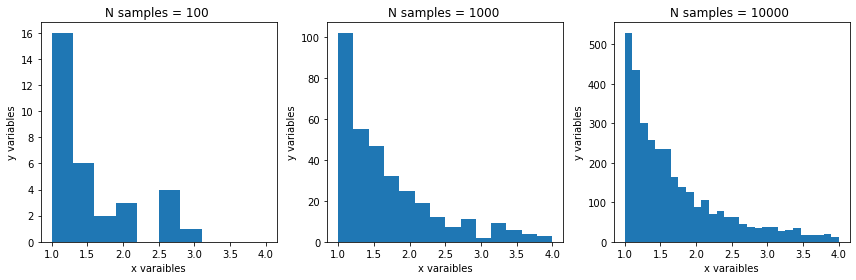

In [15]:
print()
print('================ (b) Importance Sampling ==================')
plt.figure(figsize=(12,4))

def func_2(x):
    y = np.sqrt(x)/np.sqrt(x+1) *np.exp(-x)/(1/2*(x-1))
    return y 

N_size = [1000,10000,100000]
for i, n_sample in enumerate(N_size):
    y_simple_MC =[]
    # for _ in range(n_sample):
    u = np.random.uniform(0,1,n_sample)
    x = (np.sqrt(4*u)+1)
        # y_simple_MC.append([func_2(x)])
    y_simple_MC = func_2(x)
    mean_simple_mc = np.mean(y_simple_MC)
    variance_np = np.var(y_simple_MC)
    SE_simple = np.sqrt(variance_np)/np.sqrt(n_sample)

    lower_b = mean_simple_mc-zscore95*SE_simple
    upper_b = mean_simple_mc+zscore95*SE_simple
    CI95 = [lower_b , upper_b]
    print('')
    print('**** Number of sample = ', n_sample/10,'  ****')
    print('theta = ', mean_simple_mc, ' Standar Error = ',SE_simple )
    print('95% Confidence intervals = ', CI95)
    plt.subplot(1,3,i+1)
    plt.hist(y_simple_MC,bins='auto',range=[1,4])
    plt.xlabel('x varaibles')
    plt.ylabel('y variables')
    plt.title('N samples = %i ' %(n_sample/10))
    plt.tight_layout()
    


# Question 2 (c) Control Variate

In [3]:
print()
print('================ (c) Control Variate ==================')

N_size = [100,1000,10000]
for n_sample in N_size:
    U = np.random.uniform(1,3,size = n_sample)
    U2 = np.random.uniform(1,3,size = n_sample)
    delta = func(U)*2
    delta_star = -2/5*(1/3*U2-1)

    theta_MC = np.mean(delta)
    theta_MC_star = np.mean(delta_star)
    var_MC = np.var(delta)
    var_MC_star = np.var(delta_star)

    covar_matrix = np.cov([delta,delta_star])
    covariance = covar_matrix[0][1]
    alpha = -covariance/var_MC_star

    theta_CV = theta_MC +alpha*(theta_MC_star-0)
    variance_CV = var_MC + alpha**2*var_MC_star + 2*alpha*covariance

    SE_cv = np.sqrt(variance_CV/n_sample)

    lower_b = theta_CV - zscore95*SE_cv
    upper_b = theta_CV + zscore95*SE_cv
    CI95 = [lower_b , upper_b]
    print('')
    print('**** Number of sample = ', n_sample,'  ****')
    print('theta = ', theta_CV, ' Standar Error  = ',SE_cv )
    print('95% Confidence intervals = ', CI95)



================ (c) Control Variate ==================

**** Number of sample =  100   ****
theta =  0.25824066343181074  Standar Error  =  0.012936532371352828
95% Confidence intervals =  [0.2328850599839592, 0.2835962668796623]

**** Number of sample =  1000   ****
theta =  0.2464549193710888  Standar Error  =  0.0039010489451320367
95% Confidence intervals =  [0.23880886343863, 0.2541009753035476]

**** Number of sample =  10000   ****
theta =  0.24679552614954745  Standar Error  =  0.0012514351078228684
95% Confidence intervals =  [0.2443427133382146, 0.24924833896088028]


# Question 2 (d) Antitethic Sampling

In [4]:
print()
print('================ (d) Antitethic Sampling ==================')

N_size = [100,1000,10000]
for n_sample in N_size:
    U =np.random.uniform(0,1,n_sample)

    x1 = 1+ 2*U
    x2 = 3- 2*U
    delta1 = func(x1)*2
    delta2 = func(x2)*2
    AS_theta = (np.mean(delta1)+np.mean(delta2))/2

    cov_as = np.cov((delta1,delta2),bias=True)[0][1]
    AS_var = 1/4*(np.var(delta1)+np.var(delta1)) +1/2 *cov_as

    AS_SE= np.sqrt(AS_var/n_sample)

    lower_b = AS_theta -zscore95*AS_SE
    upper_b = AS_theta +zscore95*AS_SE
    CI95 = [lower_b , upper_b]
    print('')
    print('**** Number of sample = ', n_sample,'  ****')
    print('theta = ', AS_theta, ' Standar Error  = ', AS_SE )
    print('95% Confidence intervals = ', CI95)



================ (d) Antitethic Sampling ==================

**** Number of sample =  100   ****
theta =  0.2474896905765412  Standar Error  =  0.003606453653546631
95% Confidence intervals =  [0.2404210414155898, 0.2545583397374926]

**** Number of sample =  1000   ****
theta =  0.24757731374711336  Standar Error  =  0.0006987582271032235
95% Confidence intervals =  [0.24620774762199105, 0.24894687987223568]

**** Number of sample =  10000   ****
theta =  0.24946412756988912  Standar Error  =  0.0002490788827268179
95% Confidence intervals =  [0.24897593295974454, 0.2499523221800337]


# Question 2 (e) Comparisons

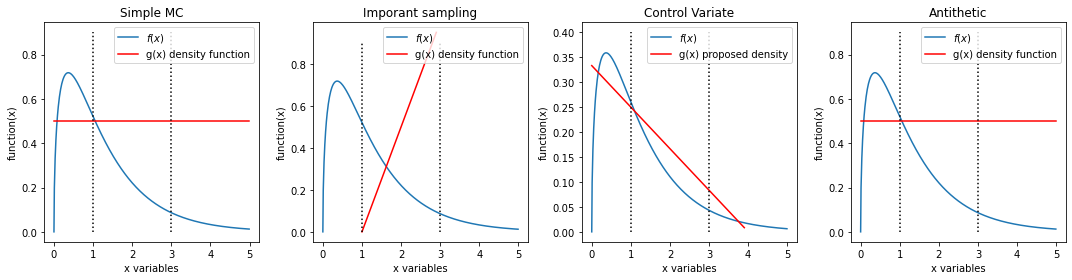

In [16]:
import numpy as np 
import matplotlib.pyplot as plt


def func(x):
    y = np.sqrt(x)/np.sqrt(x+1) *np.exp(-x)
    return y 

x_range = np.arange(0,5,0.01)
x_range_1=np.arange(0,1,0.1)
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
plt.plot(x_range,2*func(x_range),label='$f(x)$')
plt.plot(x_range,np.ones_like(x_range)/2,label='g(x) density function',color='red')
plt.plot(np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.plot(3*np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.xlabel('x variables')
plt.ylabel('function(x)')
plt.title('Simple MC')
plt.legend()
plt.tight_layout()


def func_g(x):
    y = (-1/2)*(1-x)
    return y

x_range = np.arange(0,5,0.01)
x_range_1=np.arange(0,1,0.1)
plt.subplot(1,4,2)
plt.plot(x_range,2*func(x_range),label='$f(x)$')
plt.plot(np.arange(1,3,0.1),func_g(np.arange(1,3,0.1)),label='g(x) density function',color='red')
plt.plot(np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.plot(3*np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.xlabel('x variables')
plt.ylabel('function(x)')
plt.legend()
plt.title('Imporant sampling')
plt.tight_layout()


def func_g(x):
    y = (-1/3)*(1/4*x-1)
    return y

x_range = np.arange(0,5,0.01)
x_range_1=np.arange(0,.5,0.1)
plt.subplot(1,4,3)
plt.plot(x_range,func(x_range),label='$f(x)$')
plt.plot(np.arange(0,4,0.1),func_g(np.arange(0,4,0.1)),label='g(x) proposed density',color='red')
plt.plot(np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.plot(3*np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.xlabel('x variables')
plt.ylabel('function(x)')
plt.title('Control Variate')
plt.legend()
plt.tight_layout()



def func(x):
    y = np.sqrt(x)/np.sqrt(x+1) *np.exp(-x)
    return y 

x_range = np.arange(0,5,0.01)
x_range_1=np.arange(0,1,0.1)
plt.subplot(1,4,4)
plt.plot(x_range,2*func(x_range),label='$f(x)$')
plt.plot(x_range,np.ones_like(x_range)/2,label='g(x) density function',color='red')
plt.plot(np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.plot(3*np.ones_like(x_range_1),x_range_1, linestyle=':',color='black')
plt.xlabel('x variables')
plt.ylabel('function(x)')
plt.legend()
plt.title('Antithetic')
plt.tight_layout()
plt.show()